In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

df = df.iloc[:-2]

# Assuming the DataFrame has columns named 'x', 'y', 'z', and 'w' for the four variables
# Replace 'x', 'y', 'z', and 'w' with the actual column names from your CSV file
x_values = df['Total fertlilizers used/tonnes']
y_values = df['Number of agricultural tractors in use']
z_values = df['Coffee(Hg/Ha)']
w_values = df['Annual Mean Temperature (Degrees C)'].astype(float)
df.dropna(subset=['Annual Mean Temperature (Degrees C)'], inplace=True)

# Convert the column to float
df['Annual Mean Temperature (Degrees C)'] = df['Annual Mean Temperature (Degrees C)'].astype(float)

# Combine two columns into a vectorized format
vectorized_values = x_values + y_values

# Define grid
xi = np.linspace(min(x_values), max(x_values), 100)
yi = np.linspace(min(y_values), max(y_values), 100)
zi = griddata((x_values, y_values, w_values), z_values, (xi[None,:], yi[:,None]), method='linear')

# Plotting 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*np.meshgrid(xi, yi), zi, cmap='viridis')
ax.set_xlabel('Total fertlilizers used/tonnes')
ax.set_ylabel('Number of agricultural tractors in use')
ax.set_zlabel('Coffee(Hg/Ha)')
ax.set_title('3D Plot of Coffee(Hg/Ha) against Fertilizer, Tractor Use, and Temperature')
ax.grid(True)
ax.set_facecolor('lightgrey')
plt.show()

# Plotting Contour Plot
plt.figure(figsize=(10, 6))

# Create a masked array where values <= 15000 are masked
zi_masked = np.ma.masked_where(zi <= 15000, zi)

# Plot the masked array as a heatmap
plt.imshow(zi_masked, extent=[min(x_values), max(x_values), min(y_values), max(y_values)], origin='lower', cmap='viridis')

# Add a color bar
plt.colorbar(label='Coffee(Hg/Ha)')

plt.xlabel('Total fertlilizers used/tonnes')
plt.ylabel('Number of agricultural tractors in use')
plt.title('Heatmap of Coffee(Hg/Ha) where value > 15000')

plt.tight_layout()
plt.show()

# Find the index of the maximum value in the zi array
max_value_index = np.unravel_index(np.argmax(zi, axis=None), zi.shape)

# Retrieve the corresponding coordinates from xi and yi arrays
max_point_coordinates = (xi[max_value_index[1]], yi[max_value_index[0]])

# Break down the max point coordinates into different columns
max_point_details = {
    'Total fertlilizers used/tonnes': max_point_coordinates[0],
    'Number of agricultural tractors in use': max_point_coordinates[1],
    'Annual Mean Temperature (Degrees C)': w_values[max_value_index[0]]
}

# Print the coordinates of the maximum point
print("Max Point Details")
for key, value in max_point_details.items():
    print(f"{key}: {value}")

ValueError: Points cannot contain NaN

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Drop NaN values from 'x', 'y', 'z', 'w', and 'v' columns
df.dropna(subset=['Fertilizers needed per yield', 'Number of agricultural tractors in use', 'Coffee(Hg/Ha)', 'Annual Mean Temperature (Degrees C)', 'Mean season precipitation(MAM-JJAS) (mm)'], inplace=True)

# Assuming the DataFrame has columns named 'x', 'y', 'z', 'w', and 'v' for the five variables
# Replace 'x', 'y', 'z', 'w', and 'v' with the actual column names from your CSV file
x_values = df['Fertilizers needed per yield']
y_values = df['Number of agricultural tractors in use']
z_values = df['Coffee(Hg/Ha)']
w_values = df['Annual Mean Temperature (Degrees C)'].astype(float)
v_values = df['Mean season precipitation(MAM-JJAS) (mm)'].astype(float)

# Define grid
xi = np.linspace(min(x_values), max(x_values), 100)
yi = np.linspace(min(y_values), max(y_values), 100)

# Flatten xi and yi
xi_flat = xi.flatten()
yi_flat = yi.flatten()

# Define zi using griddata
zi = griddata((x_values, y_values, w_values, v_values), z_values, (xi_flat, yi_flat, np.mean(w_values), np.mean(v_values)), method='nearest')

# Reshape zi to match the shape of xi and yi
zi = zi.reshape(xi.shape)

# Find the index of the maximum value in the zi array
max_value_index = np.unravel_index(np.argmax(zi, axis=None), zi.shape)

# Print the maximum value index
print("Maximum value index:", max_value_index)

# Retrieve the corresponding values of temperature, fertilizers, and agricultural tractors
max_temperature = w_values.iloc[max_value_index[94]]
max_fertilizers = x_values.iloc[max_value_index[94]]
max_tractors = y_values.iloc[max_value_index[94]]
max_precipitation = v_values.iloc[max_value_index[94]]

# Print out the values
print("Values that maximize the coffee yield:")
print(f"Temperature: {max_temperature} °C")
print(f"Fertilizers needed per yield: {max_fertilizers} tonnes")
print(f"Agricultural Tractors: {max_tractors}")
print(f"Precipitation: {max_precipitation} mm")

Maximum value index: (94,)


IndexError: tuple index out of range

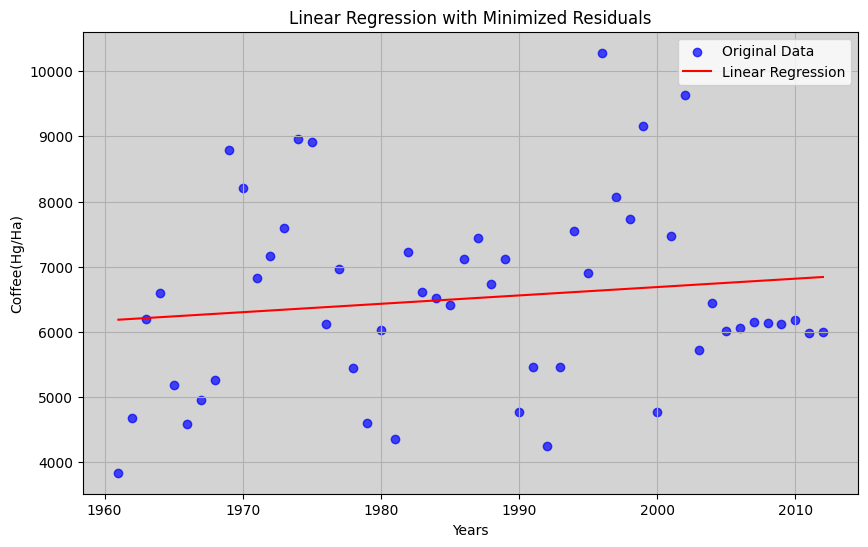

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Drop the last two rows from the DataFrame
df = df.iloc[:-2]

# Assuming the DataFrame has columns named 'Years' and 'Coffee(Hg/Ha)'
x_values = df['Years']
y_values = df['Coffee(Hg/Ha)']

# Define the linear regression model
def linear_func(x, m, b):
    return m * x + b

# Fit the linear regression model to the data
params, covariance = curve_fit(linear_func, x_values, y_values)

# Extract the slope and intercept from the parameters
slope, intercept = params

# Generate the predicted y values based on the linear model
y_predicted = linear_func(x_values, slope, intercept)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(x_values, y_values, c='blue', alpha=0.7, label='Original Data')

# Plot the linear regression line
plt.plot(x_values, y_predicted, color='red', label='Linear Regression')

# Customizing labels and title
plt.xlabel('Years')
plt.ylabel('Coffee(Hg/Ha)')
plt.title('Linear Regression with Minimized Residuals')

# Customizing grid and background
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

# Show legend
plt.legend()

plt.show()

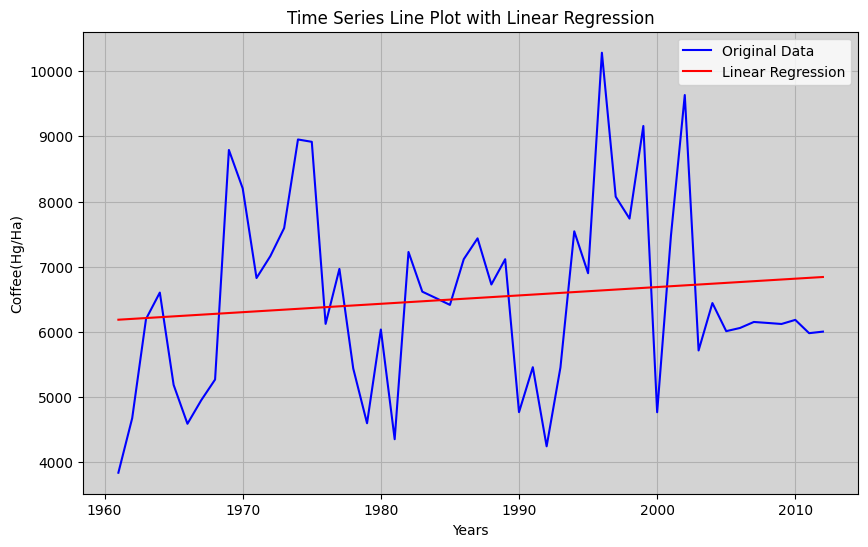

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Drop the last two rows from the DataFrame
df = df.iloc[:-2]

# Assuming the DataFrame has columns named 'Years' and 'Coffee(Hg/Ha)'
x_values = df['Years']
y_values = df['Coffee(Hg/Ha)']

# Define the linear regression model
def linear_func(x, m, b):
    return m * x + b

# Fit the linear regression model to the data
params, covariance = curve_fit(linear_func, x_values, y_values)

# Extract the slope and intercept from the parameters
slope, intercept = params

# Generate the predicted y values based on the linear model
y_predicted = linear_func(x_values, slope, intercept)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data as a time series line plot
sns.lineplot(x=x_values, y=y_values, color='blue', label='Original Data')

# Plot the linear regression line
plt.plot(x_values, y_predicted, color='red', label='Linear Regression')

# Customizing labels and title
plt.xlabel('Years')
plt.ylabel('Coffee(Hg/Ha)')
plt.title('Time Series Line Plot with Linear Regression')

# Customizing grid and background
plt.grid(True)
plt.gca().set_facecolor('lightgrey')

# Show legend
plt.legend()

plt.show()

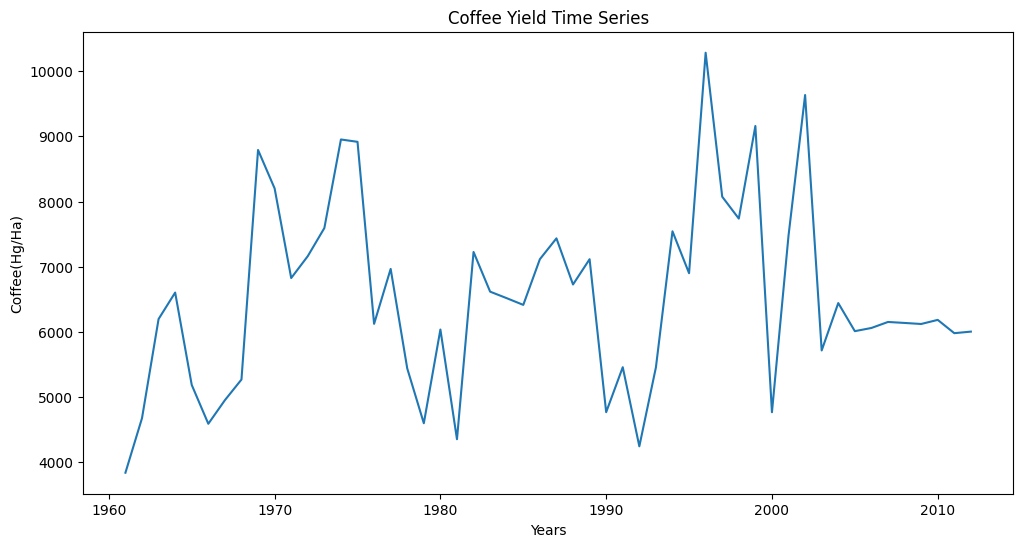

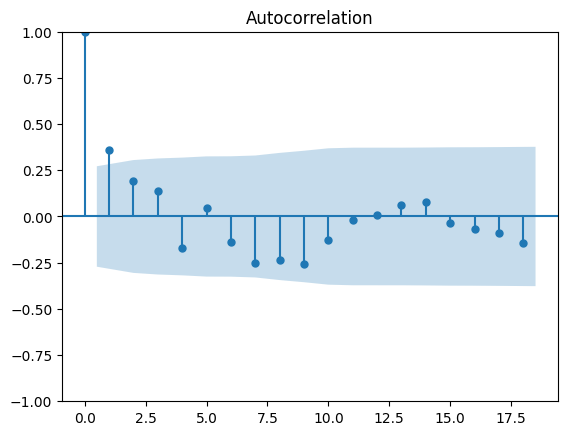

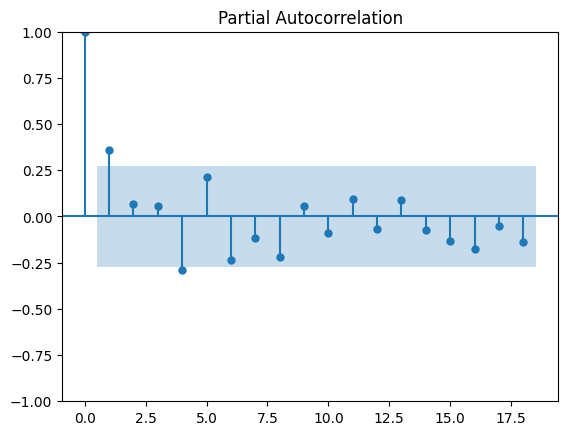

                               SARIMAX Results                                
Dep. Variable:          Coffee(Hg/Ha)   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -443.619
Date:                Sat, 16 Mar 2024   AIC                            893.237
Time:                        10:46:56   BIC                            899.033
Sample:                             0   HQIC                           895.452
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4943      0.185      2.678      0.007       0.133       0.856
ma.L1         -0.9434      0.089    -10.624      0.000      -1.117      -0.769
sigma2      1.998e+06   3.57e+05      5.590      0.0

c:\Users\abhimanyu pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhimanyu pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhimanyu pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhimanyu pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Read the CSV file into a DataFrame
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Drop the last two rows from the DataFrame
df = df.iloc[:-2]

# Assuming the DataFrame has columns named 'Years' and 'Coffee(Hg/Ha)'
data = df.set_index('Years')['Coffee(Hg/Ha)']

# Visualize the time series
data.plot(figsize=(12, 6))
plt.title('Coffee Yield Time Series')
plt.xlabel('Years')
plt.ylabel('Coffee(Hg/Ha)')
plt.show()

# Stationarity check (you can use more advanced methods if needed)
# Example: df['Coffee(Hg/Ha)'].diff().plot(figsize=(12, 6))

# Determine ARIMA parameters using ACF and PACF plots
plot_acf(data)
plt.show()

plot_pacf(data)
plt.show()

# Fit ARIMA model
model = ARIMA(data, order=(1, 1, 1))  # Example order, replace with determined values
results = model.fit()

# Evaluate model
print(results.summary())

# Make predictions
forecast = results.predict(start=len(data), end=len(data)+10)  # Example forecast for the next 10 periods
print(forecast)

Values that maximize coffee yield:
Area Requirement: 4069.838383838384
Mean season precipitation(MAM-JJAS) (mm): 81.80050505050505


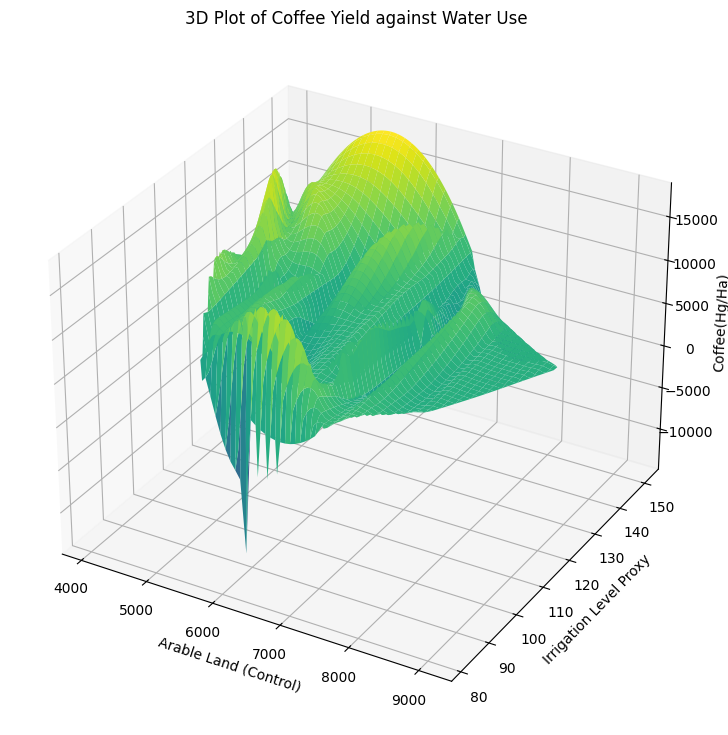

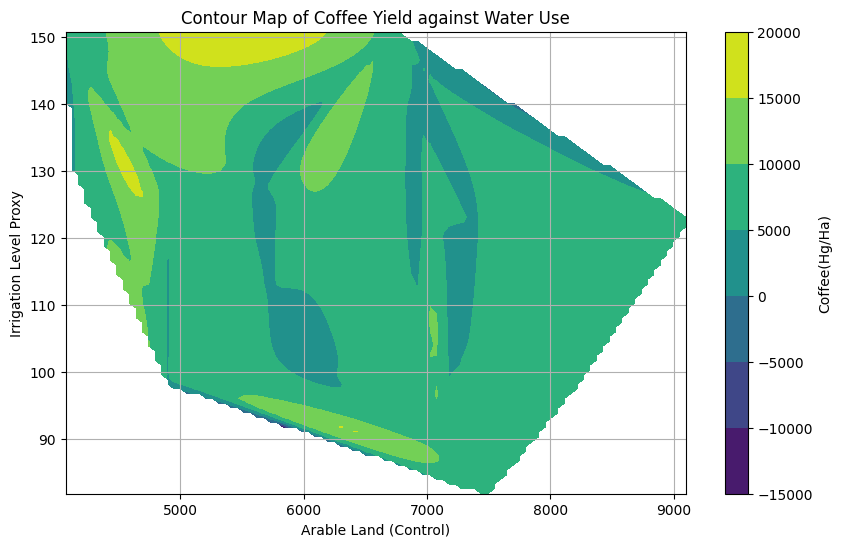

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

df = df.iloc[:-2]

df.dropna(subset=['Arable and permanent crops land (K/Ha)', 'Mean season precipitation(MAM-JJAS) (mm)', 'Coffee(Hg/Ha)'], inplace=True)

# Assuming the DataFrame has columns named 'x', 'y', and 'z' for the three variables
# Replace 'x', 'y', and 'z' with the actual column names from your CSV file
x_values = df['Arable and permanent crops land (K/Ha)']
y_values = df['Mean season precipitation(MAM-JJAS) (mm)']
z_values = df['Coffee(Hg/Ha)']

# Define grid excluding the first and last elements
xi = np.linspace(min(x_values), max(x_values), 100)[1:-1]
yi = np.linspace(min(y_values), max(y_values), 100)[1:-1]

# Calculate zi using the modified grid
zi = griddata((x_values, y_values), z_values, (xi[None,:], yi[:,None]), method='cubic')

# Plotting 3D Plot
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*np.meshgrid(xi, yi), zi, cmap='viridis')
ax.set_xlabel('Arable Land (Control)')
ax.set_ylabel('Irrigation Level Proxy')
ax.set_zlabel('Coffee(Hg/Ha)')
ax.set_title('3D Plot of Coffee Yield against Water Use')
ax.grid(True)


# Find maximum value of zi
max_zi_index = np.unravel_index(np.argmax(zi, axis=None), zi.shape)
max_zi_x, max_zi_y = xi[max_zi_index[1]], yi[max_zi_index[0]]

# Print the values
print("Values that maximize coffee yield:")
print(f"Area Requirement: {max_zi_x}")
print(f"Mean season precipitation(MAM-JJAS) (mm): {max_zi_y}")

# Plotting Contour Map
plt.figure(figsize=(10, 6))
contour = plt.contourf(*np.meshgrid(xi, yi), zi, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('Coffee(Hg/Ha)')
plt.xlabel('Arable Land (Control)')
plt.ylabel('Irrigation Level Proxy')
plt.title('Contour Map of Coffee Yield against Water Use')
plt.grid(True)
plt.show()

In [122]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Path to the CSV file in the Downloads folder
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Remove the last two rows if necessary and drop rows with missing values
df = df.iloc[:-2]
df.dropna(subset=['Arable and permanent crops land (K/Ha)', 
                  'Mean season precipitation(MAM-JJAS) (mm)', 
                  'Coffee(Hg/Ha)'], inplace=True)

# Extracting features and target variable
X = df[['Mean season precipitation(MAM-JJAS) (mm)', 'Arable and permanent crops land (K/Ha)']]
y = df['Coffee(Hg/Ha)']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (slopes) of the model
precipitation_coefficient = model.coef_[0]
land_coefficient = model.coef_[1]
intercept = model.intercept_

# Output the correlation between coffee yield and precipitation
print("Correlation between coffee yield and precipitation:")
print(f"Coffee yield = {precipitation_coefficient:.2f} * Precipitation + {land_coefficient:.2f} * Land + {intercept:.2f}")



Correlation between coffee yield and precipitation:
Coffee yield = 69.83 * Precipitation + 2.57 * Land + -16465.07


Parameters of the logistic function:
L (Maximum yield): 8541.94443
k (Growth rate): 0.00100
x0 (Midpoint of growth): 1.00000


c:\Users\abhimanyu pandey\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\abhimanyu pandey\AppData\Local\Temp\ipykernel_18724\456818158.py:61: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residual_logistic, color=(0, 0.5, 0), label='Logistic Residuals', shade=True)  # Dark green (RGB: 0, 128, 0)
C:\Users\abhimanyu pandey\AppData\Local\Temp\ipykernel_18724\456818158.py:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residual_linear, color=(0, 0.8, 0), label='Linear Regression Residuals', shade=True)  # Light green (RGB: 128, 255, 128)


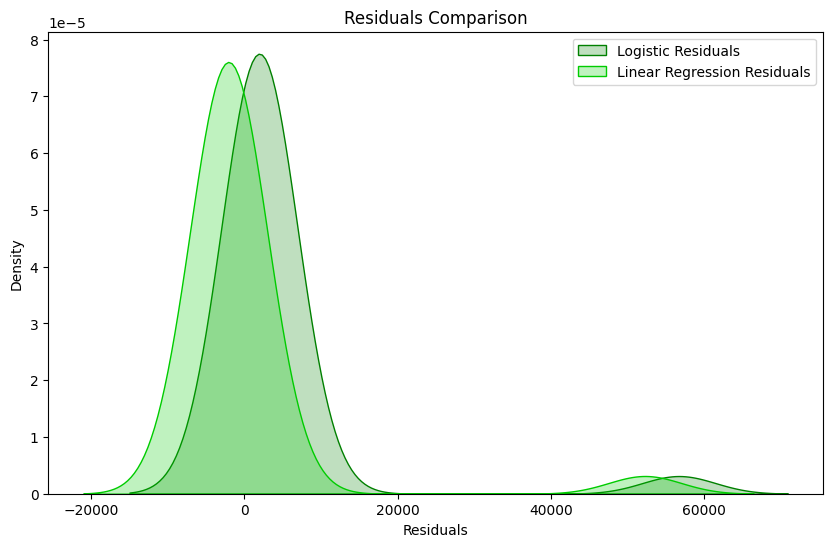

The logistic function has smaller residuals.
RMSE for logistic function: 11182.04902


In [186]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# Define the logistic function
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Path to the CSV file
file_path = "C:/Users/abhimanyu pandey/Downloads/bcgTest.csv"

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path)
    df = df.iloc[:-2]
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# Remove rows with missing values
df.dropna(subset=['Mean season precipitation(MAM-JJAS) (mm)', 'Coffee(Hg/Ha)'], inplace=True)

# Extracting features and target variable
x_values = df['Mean season precipitation(MAM-JJAS) (mm)']
y_values = df['Coffee(Hg/Ha)']

# Fit the logistic function to the data
params_logistic, covariance_logistic = curve_fit(logistic_func, x_values, y_values, maxfev=10000)

# Get the fitted parameters for the logistic function
L, k, x0 = params_logistic
k = k * 0.001

# Output the parameters of the logistic function
print("Parameters of the logistic function:")
print(f"L (Maximum yield): {L:.5f}")
print(f"k (Growth rate): {k:.5f}")
print(f"x0 (Midpoint of growth): {x0:.5f}")

# Calculate the predicted values using the logistic function with the fitted parameters
predicted_values_logistic = logistic_func(x_values, L, k, x0)

# Calculate the residual for the logistic function
residual_logistic = y_values - predicted_values_logistic

# Fit linear regression to the data
linear_model = LinearRegression()
linear_model.fit(x_values.values.reshape(-1, 1), y_values)

# Calculate the predicted values using the linear regression model
linear_predicted_values = linear_model.predict(x_values.values.reshape(-1, 1))

# Calculate the residual for the linear regression model
residual_linear = y_values - linear_predicted_values


import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(residual_logistic, color=(0, 0.5, 0), label='Logistic Residuals', shade=True)  # Dark green (RGB: 0, 128, 0)
sns.kdeplot(residual_linear, color=(0, 0.8, 0), label='Linear Regression Residuals', shade=True)  # Light green (RGB: 128, 255, 128)
plt.title('Residuals Comparison')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid(False)  # Remove gridlines
plt.show()

from sklearn.metrics import mean_squared_error

# Calculate the root mean squared error (RMSE) for both models
rmse_logistic = np.sqrt(mean_squared_error(y_values, predicted_values_logistic))
rmse_linear = np.sqrt(mean_squared_error(y_values, linear_predicted_values))

# Output which model has smaller residuals
if rmse_logistic > rmse_linear:
    print("The logistic function has smaller residuals.")
    print(f"RMSE for logistic function: {rmse_logistic:.5f}")
else:
    print("The linear regression model has smaller residuals.")
    print(f"RMSE for linear regression model: {rmse_linear:.5f}")